In [1]:
#!pip install konlpy

In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3


In [4]:
dbname='0630_wadizDB_최종.db'
def insData(d, tblname='wadiztable'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from '+tblname+' where ncategory="'+d+'"'
        ckkey=cur.execute(sql).fetchall()
        if ckkey:
            return ckkey

In [5]:
def category(d):
    data=insData(d)
    df=pd.DataFrame(data)
    names=['idx','category','title','content','supporter','amount','percent','key']
    df.columns=names
    encore = "앵콜"
    df['label'] = 0

    for i, title in enumerate(df['title']):
        if title.find(encore) > 0:
            df['label'].iloc[i] = 1
    return df

In [6]:
df = category('출판')
df

c:\programdata\anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,idx,category,title,content,supporter,amount,percent,key,label
0,19287,출판,[인싸담당자] 직무인터북: 현직자 인터뷰로 직무이해 대신 끝내줄게요!,\n 많은 분들이 자소서와 면접 준비에 힘을 쏟아요. 하지만 합격 당락을 좌우...,434,"6,683,500",668,https://www.wadiz.kr/web/campaign/detail/117144,0
1,19288,출판,3억 앵콜ㅣ펼치는 순간 고흐에 빠져들다. 갤러리북 한정판 하드커버 에디션,\n 해외 명화집에서도 느끼기 어려운 명화의 깊이에 빠져들게 만드는 책! 명화...,424,"26,356,200",263,https://www.wadiz.kr/web/campaign/detail/117440,1
2,19289,출판,[6872% 앵콜] 2시간 영문법 특급비밀 + 친절한 왕초보 영어 훈련,\n 기존 영문법 NO! 영어의 본질을 꿰뚫어 단 2시간으로 문법 공부시간을 ...,132,"2,390,400",478,https://www.wadiz.kr/web/campaign/detail/114465,1
3,19290,출판,프로 제작자가 알려주는 500개의 굿즈 제조 업체와 노하우\t\t\t,"\n 500개의 굿즈 제조 업체의 대표 품목, 사양, 단가 등을 알차게 담은 ...",66,"1,739,100",86,https://www.wadiz.kr/web/campaign/detail/111261,0
4,19291,출판,최승윤 작가의 두번째 그림책을 소장하세요,\n 최승윤 작가의 두 번째 그림책입니다. 작가의 작품 일기장을 소장하세요.\...,41,"2,891,000",289,https://www.wadiz.kr/web/campaign/detail/116863,0
...,...,...,...,...,...,...,...,...,...
487,19774,출판,"""김코치 영업"" 당신도 영업으로 성공할 수 있다.","\n 영업으로 성공하고 싶고, 경제적으로 자유로워지길 원하는며, 어쩌면 인생의...",4,"48,000",0,https://www.wadiz.kr/web/campaign/detail/19563,0
488,19775,출판,"북한땅 트레킹(경제특구,개발구 중심으로)",\n 국내 최초 북한땅 트레킹을 소개한 책자로써 남북관계 호전되면서 접근 가능...,1,0,0,https://www.wadiz.kr/web/campaign/detail/23355,0
489,19776,출판,"세상에 하나 뿐인 순간의 기록, '어떤 날은 영화처럼, 필름북'","\n 레트로 촬영소 '베를린 다락방'에서 준비한 '어떤 날은 영화처럼, 필름북...",9,0,0,https://www.wadiz.kr/web/campaign/detail/79099,0
490,19777,출판,각인되고 싶은 당신을 위한 브랜딩블로그 디자인 방법론!,\n 유명한 애니매이션 캐릭터가 가진 만큼의 매력을 반드시 당신의 퍼스널 브랜...,13,"8,000",0,https://www.wadiz.kr/web/campaign/detail/87052,0


In [7]:
from konlpy.tag import Mecab
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import re

In [10]:
df['text'] = df['title']+df['content']
df['text'].loc[:5]

0    [인싸담당자] 직무인터북: 현직자 인터뷰로 직무이해 대신 끝내줄게요!\n    많은...
1    3억 앵콜ㅣ펼치는 순간 고흐에 빠져들다. 갤러리북 한정판 하드커버 에디션\n    ...
2    [6872% 앵콜] 2시간 영문법 특급비밀 + 친절한 왕초보 영어 훈련\n    기...
3    프로 제작자가 알려주는 500개의 굿즈 제조 업체와 노하우\t\t\t\n    50...
4    최승윤 작가의 두번째 그림책을 소장하세요\n    최승윤 작가의 두 번째 그림책입니...
5    본업 + 부업 두 마리 토끼 잡는 법\n    직장인이 자신의 직무를 활용하여 부수...
Name: text, dtype: object

## 2) 데이터 정제하기

In [16]:
df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['text'].loc[:4]

c:\programdata\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    인싸담당자 직무인터북 현직자 인터뷰로 직무이해 대신 끝내줄게요    많은 분들이 자...
1    억 앵콜ㅣ펼치는 순간 고흐에 빠져들다 갤러리북 한정판 하드커버 에디션    해외 명...
2     앵콜 시간 영문법 특급비밀  친절한 왕초보 영어 훈련    기존 영문법  영어의 ...
3    프로 제작자가 알려주는 개의 굿즈 제조 업체와 노하우    개의 굿즈 제조 업체의 ...
4    최승윤 작가의 두번째 그림책을 소장하세요    최승윤 작가의 두 번째 그림책입니다 ...
Name: text, dtype: object

In [17]:
print('전처리 후 테스트용 샘플의 개수 :',len(df['text']))

전처리 후 테스트용 샘플의 개수 : 492


## 3) 토큰화

In [14]:
stopwords = list(('아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓').split())
stopwords[:3]

['아', '휴', '아이구']

In [19]:
def tknWord(txt):
    tagger = Mecab('C:\mecab\mecab-ko-dic')
    tpos = tagger.pos(txt)
    cate=['NNG','MAG','VV','NNP','NNB','VA','VCP','VCN','MAC']
    tkn=[]
    for k in tpos:
        if(k[1] in cate):
            if(len(k[0])>1):
                tkn.append(k[0])
    return tkn

In [21]:
import re
data = []
for sentence in df['text']:
    txt = re.sub('[^가-힣a-z]', ' ', sentence)
    res = tknWord(txt)
    temp_x = [word for word in res if not word in stopwords]
    #tmp = " ".join(temp_x)
    data.append(temp_x)

In [25]:
len(data[1]),len(data[2]) # data마다 길이가 다름

(746, 842)

## 4) 정수 인코딩 

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

In [29]:
print(tokenizer.word_index)

{'펀딩': 1, '리워드': 2, '영어': 3, '프로젝트': 4, '가능': 5, '시작': 6, '사용': 7, '배송': 8, '진행': 9, '제작': 10, '페이지': 11, '방법': 12, '이야기': 13, '투자': 14, '발송': 15, '서포터': 16, '결제': 17, '예정': 18, '내용': 19, '마음': 20, '기업': 21, '카드': 22, '디즈': 23, '정보': 24, '가장': 25, '필요': 26, '전자책': 27, '성공': 28, '디자인': 29, '경험': 30, '준비': 31, '교육': 32, '구성': 33, '마감': 34, '공부': 35, '강의': 36, '출판': 37, '과정': 38, '제공': 39, '참여': 40, '관련': 41, '이후': 42, '한국': 43, '이메일': 44, '문의': 45, '질문': 46, '직접': 47, '소개': 48, '확인': 49, '해당': 50, '제품': 51, '현재': 52, '세상': 53, '이해': 54, '메이커': 55, '세계': 56, '마케팅': 57, '도서': 58, '변경': 59, '주식': 60, '여행': 61, '사진': 62, '작가': 63, '창업': 64, '활용': 65, '사랑': 66, '도움': 67, '교환': 68, '추가': 69, '선물': 70, '공유': 71, '라이프': 72, '콘텐츠': 73, '미국': 74, '이유': 75, '출간': 76, '운영': 77, '기간': 78, '고민': 79, '인생': 80, '블로그': 81, '인쇄': 82, '작품': 83, '많이': 84, '계획': 85, '대화': 86, '저자': 87, '비용': 88, '종이': 89, '종료': 90, '가치': 91, '기획': 92, '이용': 93, '안내': 94, '가요': 95, '없이': 96, '금액': 97, '관심': 98, '시장': 99, '개인'

In [30]:
len(tokenizer.word_index)

15811

In [31]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 15811
등장 빈도가 2번 이하인 희귀 단어의 수: 8854
단어 집합에서 희귀 단어의 비율: 55.99898804629688
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.7662421683464995


In [32]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6958


In [33]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(data)
data = tokenizer.texts_to_sequences(data)

In [35]:
data[:1]

[[1152,
  708,
  2977,
  1580,
  419,
  708,
  54,
  725,
  1465,
  888,
  328,
  31,
  639,
  2530,
  708,
  54,
  190,
  25,
  1580,
  419,
  708,
  2977,
  10,
  190,
  908,
  12,
  2657,
  928,
  151,
  2657,
  2289,
  75,
  562,
  429,
  3385,
  2423,
  708,
  2289,
  1309,
  249,
  888,
  328,
  31,
  708,
  763,
  3634,
  708,
  190,
  25,
  3635,
  1019,
  409,
  687,
  708,
  24,
  458,
  485,
  194,
  12,
  1842,
  763,
  41,
  458,
  46,
  554,
  226,
  554,
  554,
  1386,
  24,
  3171,
  19,
  529,
  24,
  164,
  107,
  1580,
  256,
  417,
  1580,
  726,
  145,
  93,
  2218,
  3635,
  315,
  708,
  2977,
  19,
  54,
  121,
  1773,
  1700,
  33,
  639,
  1310,
  1580,
  1355,
  458,
  151,
  10,
  175,
  33,
  19,
  73,
  458,
  190,
  214,
  19,
  1,
  1774,
  577,
  73,
  2978,
  4381,
  3172,
  545,
  244,
  1580,
  329,
  708,
  2977,
  10,
  1580,
  876,
  764,
  1466,
  330,
  100,
  876,
  1640,
  3386,
  1775,
  393,
  501,
  786,
  104,
  115,
  458,
  3386,
  3386,

## 5) 패딩

리뷰의 최대 길이 : 1745
리뷰의 평균 길이 : 454.7682926829268


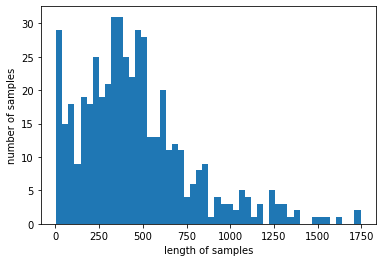

In [36]:
print('리뷰의 최대 길이 :',max(len(l) for l in data))
print('리뷰의 평균 길이 :',sum(map(len, data))/len(data))
plt.hist([len(s) for s in data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [42]:
max_len = 1100
below_threshold_len(max_len, data)

전체 샘플 중 길이가 1100 이하인 샘플의 비율: 95.1219512195122


In [44]:
data = pad_sequences(data, maxlen = max_len)

## 6) Train/Test 셋 분리 / SMOTE

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(data,df['label'],test_size=0.2,shuffle=True,stratify=df['label'],random_state=11)

In [48]:
len(x_train)

393

<AxesSubplot:>

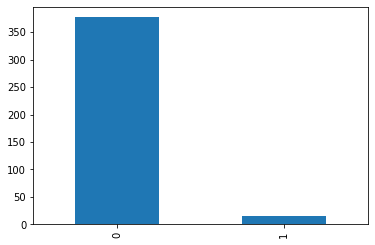

In [50]:
y_train.value_counts().plot(kind = 'bar')

In [51]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer

smote = SMOTE(random_state=0)

x_train_res,y_train_res = smote.fit_resample(x_train,y_train)
#x_train_res, y_train_res = smote.fit_resample(x, df['label'])

<AxesSubplot:>

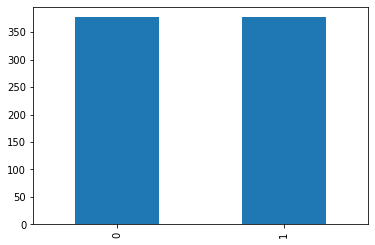

In [52]:
y_train_res.value_counts().plot(kind = 'bar')

In [53]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [54]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_res, y_train_res, epochs=15,batch_size=60, validation_split=0.2)

Epoch 1/15
11/11 [==============================] - 26s 2s/step - loss: 0.6610 - acc: 0.6302 - val_loss: 0.8202 - val_acc: 0.0000e+00
Epoch 2/15
11/11 [==============================] - 29s 3s/step - loss: 0.5664 - acc: 0.7960 - val_loss: 0.6991 - val_acc: 0.5629
Epoch 3/15
11/11 [==============================] - 37s 3s/step - loss: 0.4410 - acc: 0.8955 - val_loss: 0.6437 - val_acc: 0.7550
Epoch 4/15
11/11 [==============================] - 40s 4s/step - loss: 0.3288 - acc: 0.9171 - val_loss: 0.2636 - val_acc: 0.9404
Epoch 5/15
11/11 [==============================] - 26s 2s/step - loss: 0.1563 - acc: 0.9552 - val_loss: 0.2923 - val_acc: 0.8742
Epoch 6/15
11/11 [==============================] - 32s 3s/step - loss: 0.1076 - acc: 0.9735 - val_loss: 0.2872 - val_acc: 0.9205
Epoch 7/15
11/11 [==============================] - 34s 3s/step - loss: 0.0798 - acc: 0.9718 - val_loss: 0.2750 - val_acc: 0.9073
Epoch 8/15
11/11 [==============================] - 40s 4s/step - loss: 0.0752 - acc: 

In [61]:
pred = model.predict(x_test)

In [62]:
len(pred)

99

In [63]:
cnt = 0
for p in pred:
    print(p[0])
    if p[0] > 0.5:
        cnt += 1 
    else:
        continue
print("테스트 데이터 예상 성공률",cnt/len(pred))

0.00016719103
0.38801926
0.0020822287
0.0026638508
0.0016710162
0.0013507009
0.00015127659
0.04599011
0.0014221966
0.07544413
0.003081441
0.0012154579
0.00023543835
0.9194853
0.9971729
0.00066170096
0.00015759468
0.017629057
0.0008894503
0.53399545
0.15591821
0.9978133
0.16893151
0.001629442
0.0009381771
0.0037487447
0.00016865134
0.0025622249
0.0005917549
0.00018161535
0.09840977
0.72844243
0.00208807
0.0004453361
0.99603605
0.0028268397
0.116999
0.5671172
0.00064474344
0.91202235
0.0003068149
0.4508723
0.013710082
0.00012972951
0.9970479
0.46692702
0.96374106
0.0029771328
0.42863238
0.68957853
0.006143242
0.00062713027
0.00026643276
0.00016316772
0.0012524724
0.6181394
0.0007700622
0.00012350082
0.0016647279
0.9620332
0.0021557808
0.0016986728
0.0017087162
0.0007337332
0.92697823
0.9418162
0.0013559461
0.0023256242
0.13832274
0.9321157
0.98337495
0.00023657084
0.003153652
0.99858576
0.002580464
0.010733306
0.00046861172
0.007467419
0.00057435036
0.001516521
0.014710009
0.015405327
0.

In [65]:
eva = model.fit(pred, y_test)

4/4 [==============================] - 2s 11ms/step - loss: 0.2231 - acc: 0.9596


In [68]:
print(eva)

In [69]:
model.save("mecab_smote")

INFO:tensorflow:Assets written to: mecab_smote\assets


INFO:tensorflow:Assets written to: mecab_smote\assets


In [71]:
loaded_model = load_model("mecab_smote")

In [72]:
def sentiment_predict(new_sentence):
    new_sentence = tknWord(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    # print(new_sentence)
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    print(score)
    if(score > 0.5):
        print('성공')
    else:
        print('실패')

In [76]:
test_txt=df['content'].loc[400]
type(test_txt)

str

In [77]:
sentiment_predict(test_txt)

0.016729235649108887
실패


In [78]:
df['label'].loc[400]

0